In [250]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 301)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [251]:
data_path = "cardata.csv"

In [252]:
data = pd.read_csv(data_path)

In [253]:
df = pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


In [254]:
df.describe(include="all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [256]:
df['Age'] = np.abs(df['Year'] - max(df['Year']))
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0,4
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0,5
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0,1
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0,7
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0,4
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0,3
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0,3
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0,2
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0,3


In [257]:
target = df['Selling_Price'].iloc[:151]
x1 = df['Car_Name'].iloc[:151]

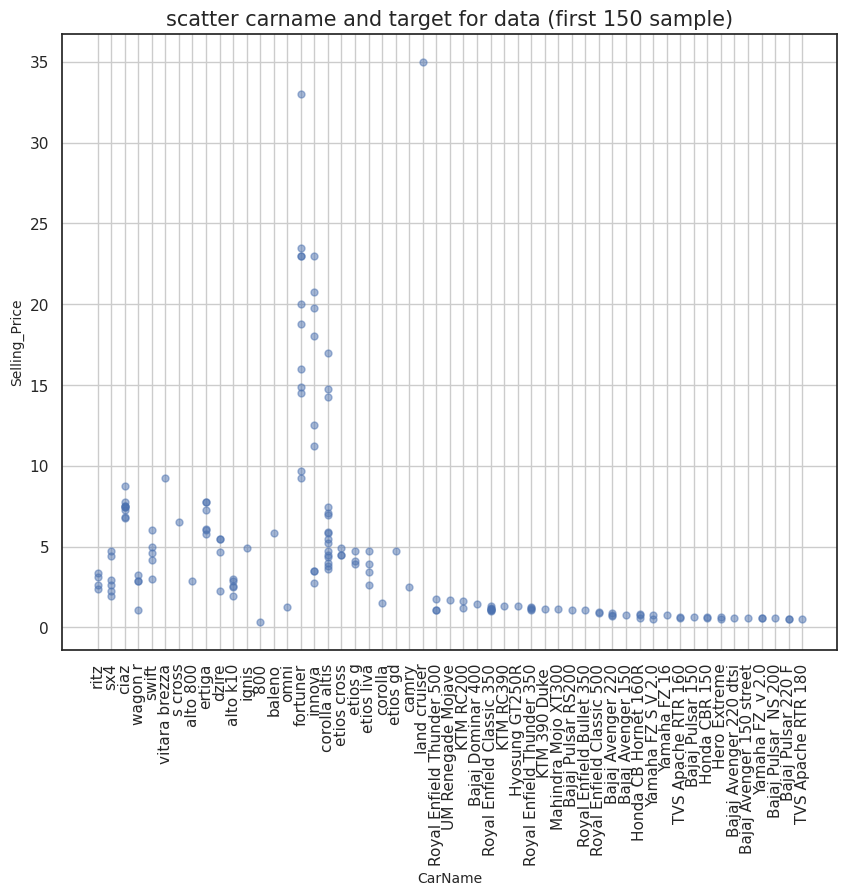

In [258]:
plt.figure(figsize=(10,8))
plt.scatter(x1, target, s=25, alpha=.5)
plt.title('scatter carname and target for data (first 150 sample)', fontsize=15)
plt.xlabel("CarName", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [259]:
target1 = df['Selling_Price'].iloc[151:]
x12 = df['Car_Name'].iloc[151:]

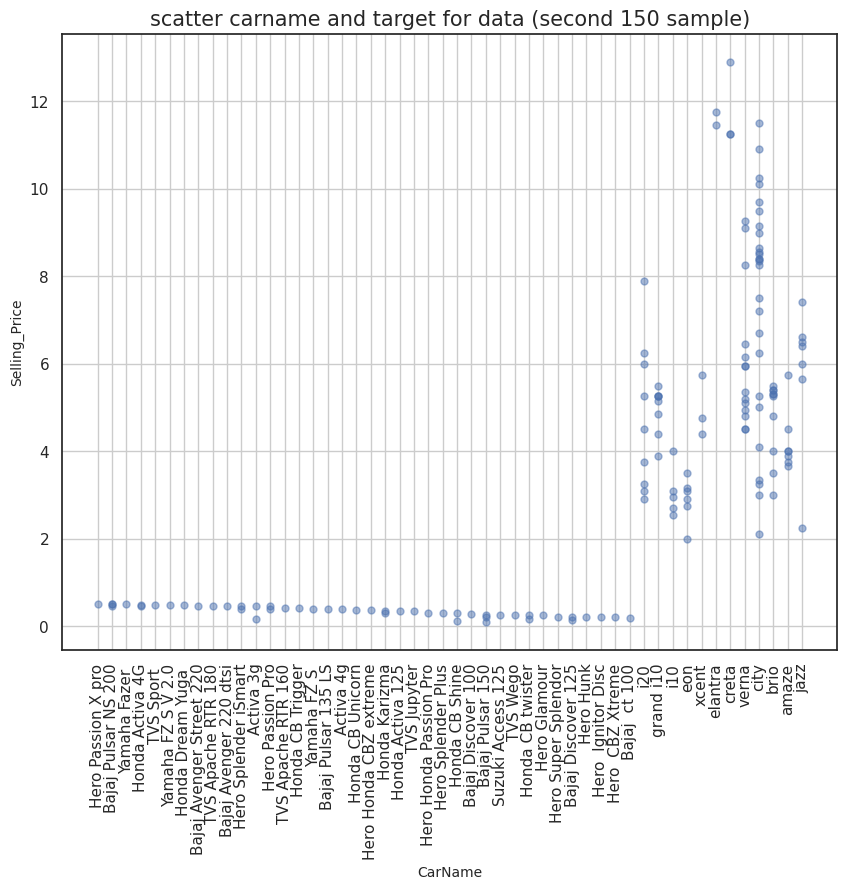

In [260]:
plt.figure(figsize=(10,8))
plt.scatter(x12, target1, s=25, alpha=.5)
plt.title('scatter carname and target for data (second 150 sample)', fontsize=15)
plt.xlabel("CarName", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [261]:
target = df['Selling_Price']
x2 = df['Year']

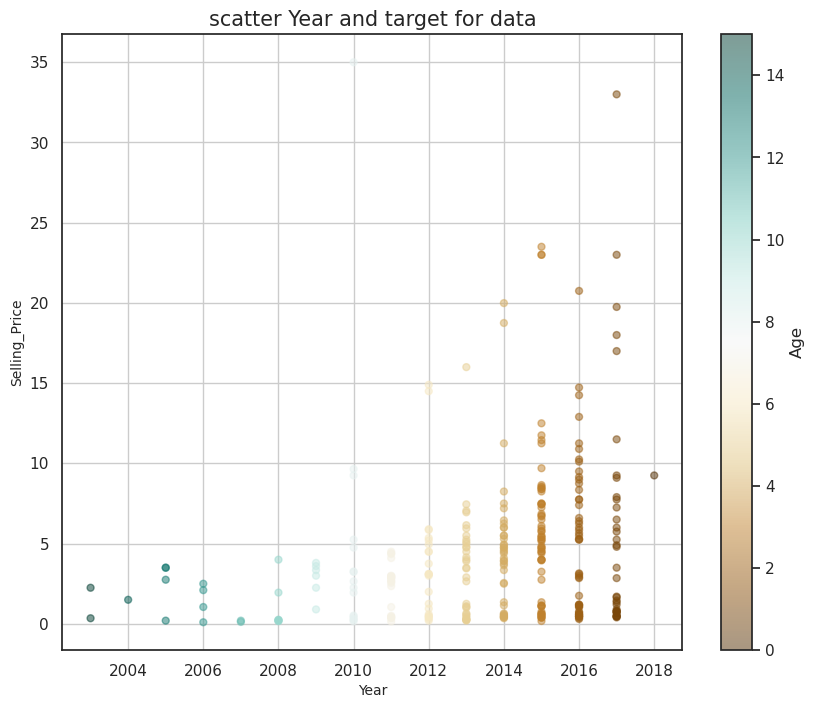

In [262]:
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'



plt.figure(figsize=(10,8))
plt.scatter(x2, target, s=25, alpha=.5, c=df.Age , cmap='BrBG' , plotnonfinite=True)
plt.title('scatter Year and target for data', fontsize=15)
plt.colorbar(label='Age')
plt.xlabel("Year", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

In [263]:
target = df['Selling_Price']
x3 = df['Present_Price']

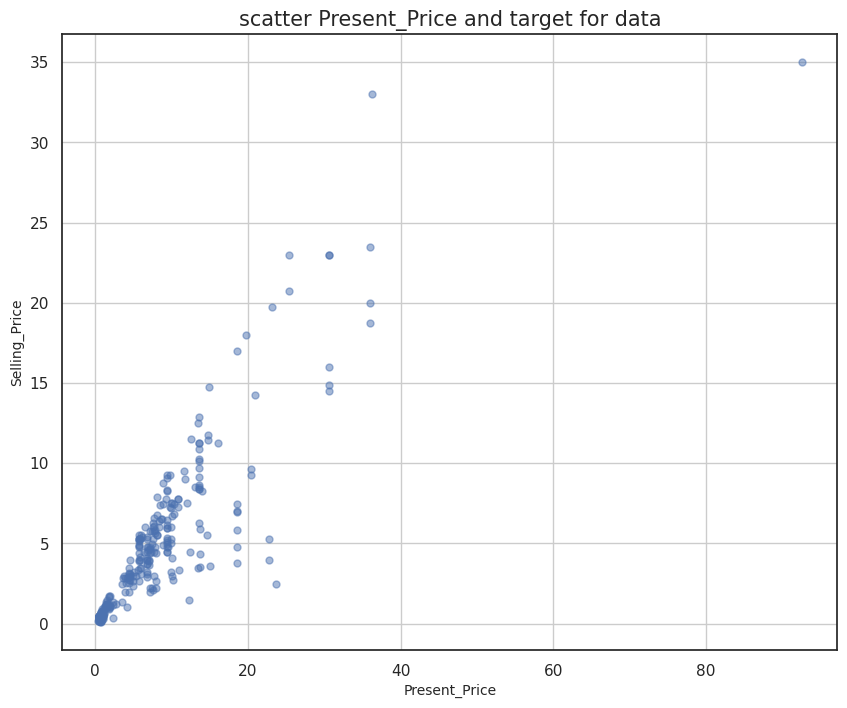

In [264]:
plt.figure(figsize=(10,8))
plt.scatter(x3, target, s=25, alpha=.5)
plt.title('scatter Present_Price and target for data', fontsize=15)
plt.xlabel("Present_Price", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

In [265]:
target = df['Selling_Price']
x4 = df['Kms_Driven']

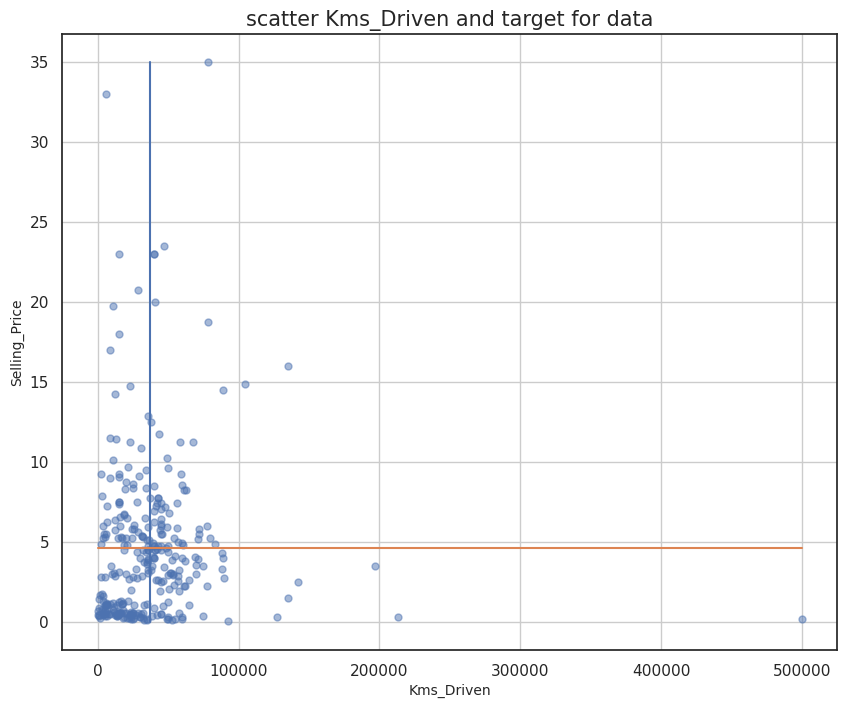

In [266]:
mean = np.mean (df['Kms_Driven'])
meany = np.mean (target)

plt.figure(figsize=(10,8))
plt.scatter(x4, target, s=25, alpha=.5)
plt.plot((mean , mean), (0, max(target)))
plt.plot((0, max(df['Kms_Driven'])), (meany, meany))
plt.title('scatter Kms_Driven and target for data', fontsize=15)
plt.xlabel("Kms_Driven", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

<AxesSubplot:>

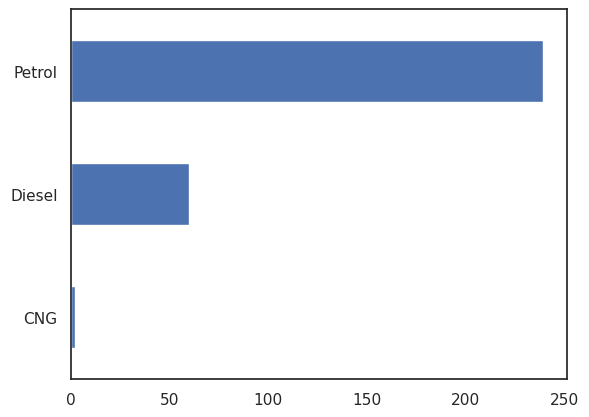

In [267]:
target = df['Selling_Price']
x5 = df['Fuel_Type']

df.Fuel_Type.value_counts().sort_values().plot(kind = 'barh')

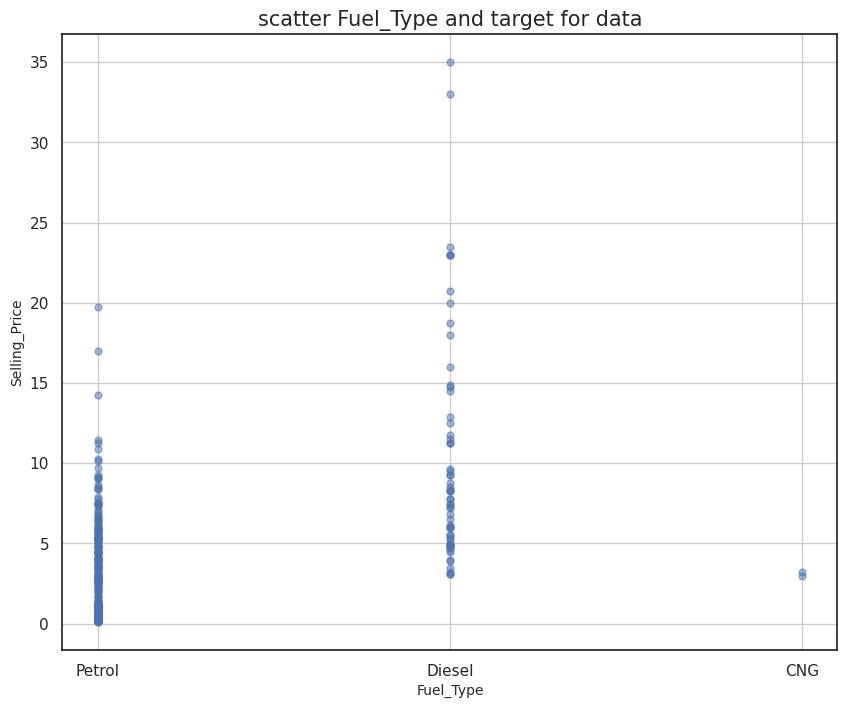

In [268]:
plt.figure(figsize=(10,8))
plt.scatter(x5, target, s=25, alpha=.5)
plt.title('scatter Fuel_Type and target for data', fontsize=15)
plt.xlabel("Fuel_Type", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

<AxesSubplot:>

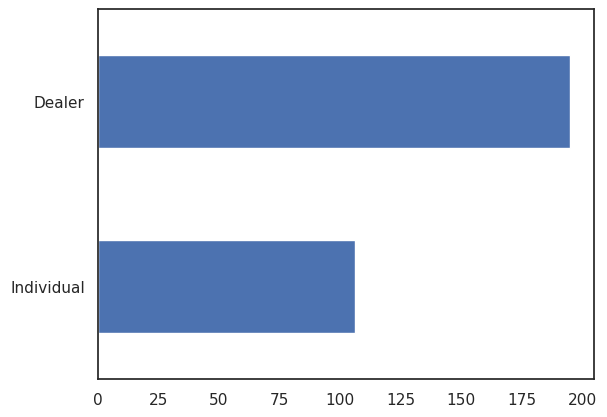

In [269]:
target = df['Selling_Price']
x6 = df['Seller_Type']

df.Seller_Type.value_counts().sort_values().plot(kind = 'barh')

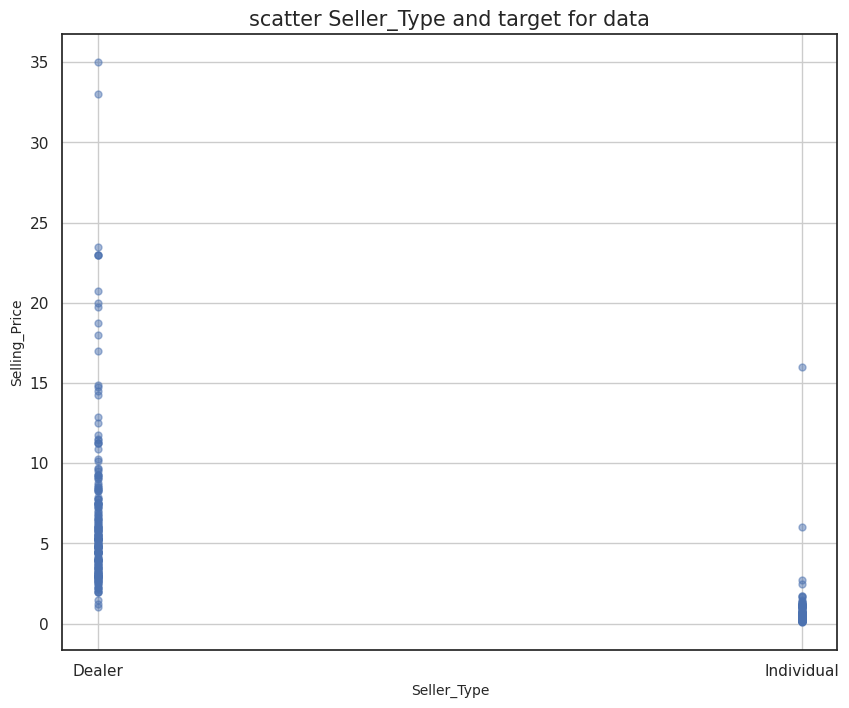

In [270]:
plt.figure(figsize=(10,8))
plt.scatter(x6, target, s=25, alpha=.5)
plt.title('scatter Seller_Type and target for data', fontsize=15)
plt.xlabel("Seller_Type", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

<AxesSubplot:>

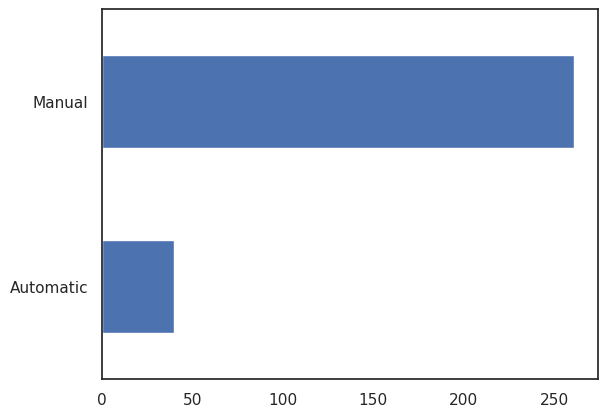

In [271]:
target = df['Selling_Price']
x7 = df['Transmission']

df.Transmission.value_counts().sort_values().plot(kind = 'barh')

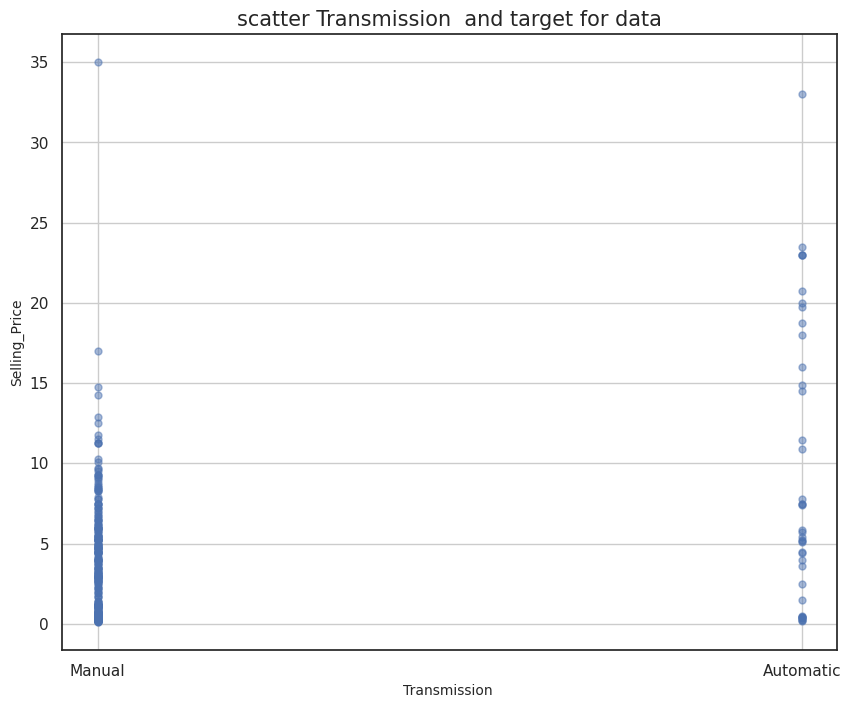

In [272]:
plt.figure(figsize=(10,8))
plt.scatter(x7, target, s=25, alpha=.5)
plt.title('scatter Transmission  and target for data', fontsize=15)
plt.xlabel("Transmission ", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

<AxesSubplot:>

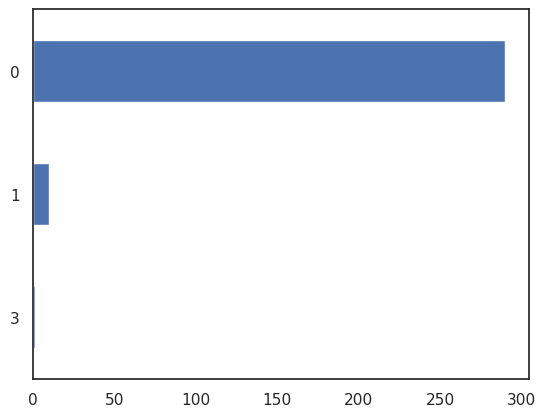

In [273]:
target = df['Selling_Price']
x8 = df['Owner']

df.Owner.value_counts().sort_values().plot(kind = 'barh')

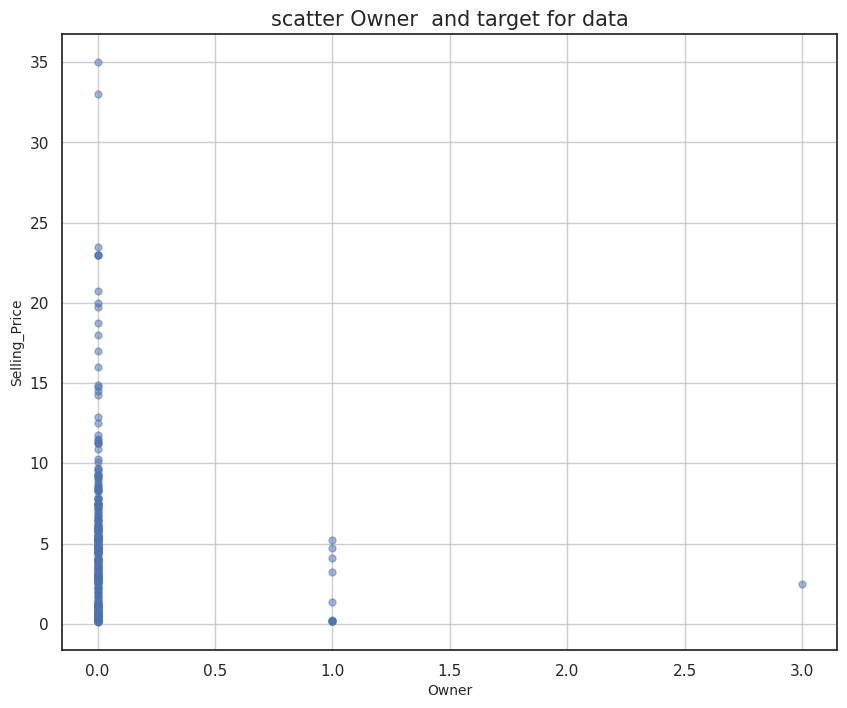

In [274]:
plt.figure(figsize=(10,8))
plt.scatter(x8, target, s=25, alpha=.5)
plt.title('scatter Owner  and target for data', fontsize=15)
plt.xlabel("Owner", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

In [275]:
target = df['Selling_Price']
x9 = df['Age']

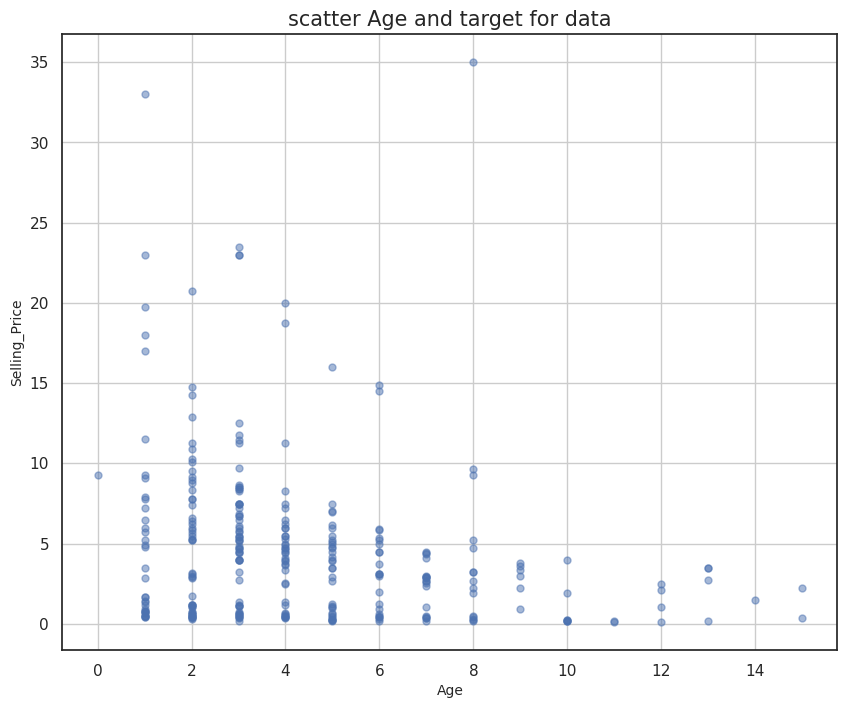

In [276]:
plt.figure(figsize=(10,8))
plt.scatter(x9, target, s=25, alpha=.5)
plt.title('scatter Age and target for data', fontsize=15)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

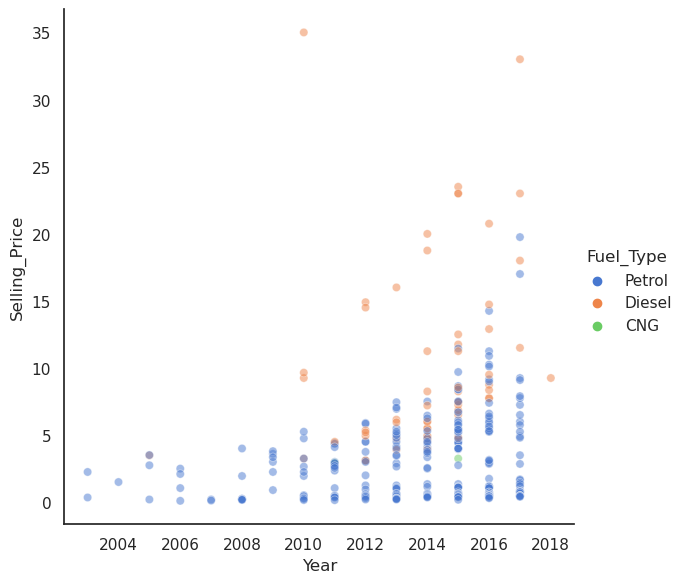

In [277]:
sns.relplot(x="Year", y="Selling_Price", hue="Fuel_Type",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

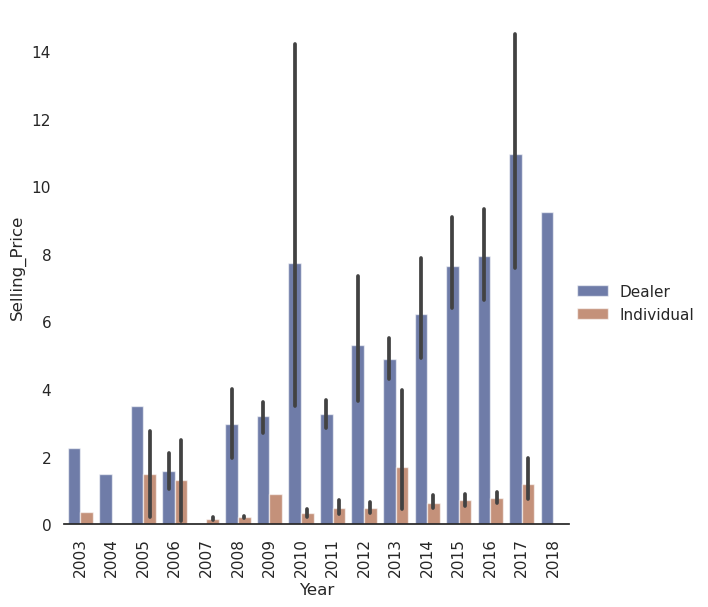

In [278]:
g = sns.catplot(
    data=df, kind="bar",
    x="Year", y="Selling_Price", hue="Seller_Type",
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Year", "Selling_Price")
g.set_xticklabels(rotation=90)
g.legend.set_title("")

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

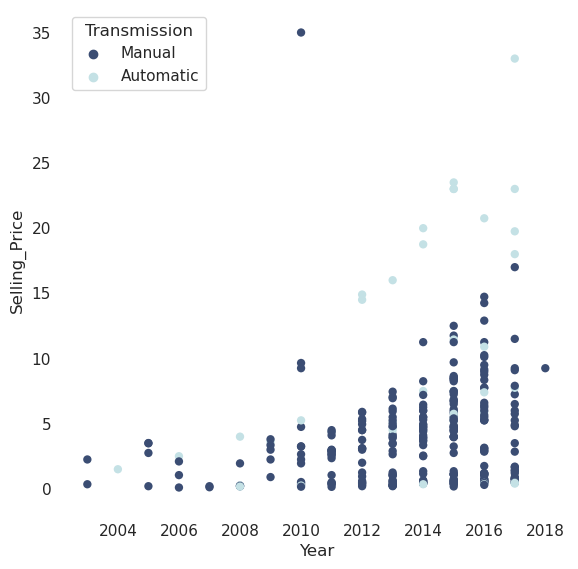

In [279]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Year", y="Selling_Price",
                hue="Transmission",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

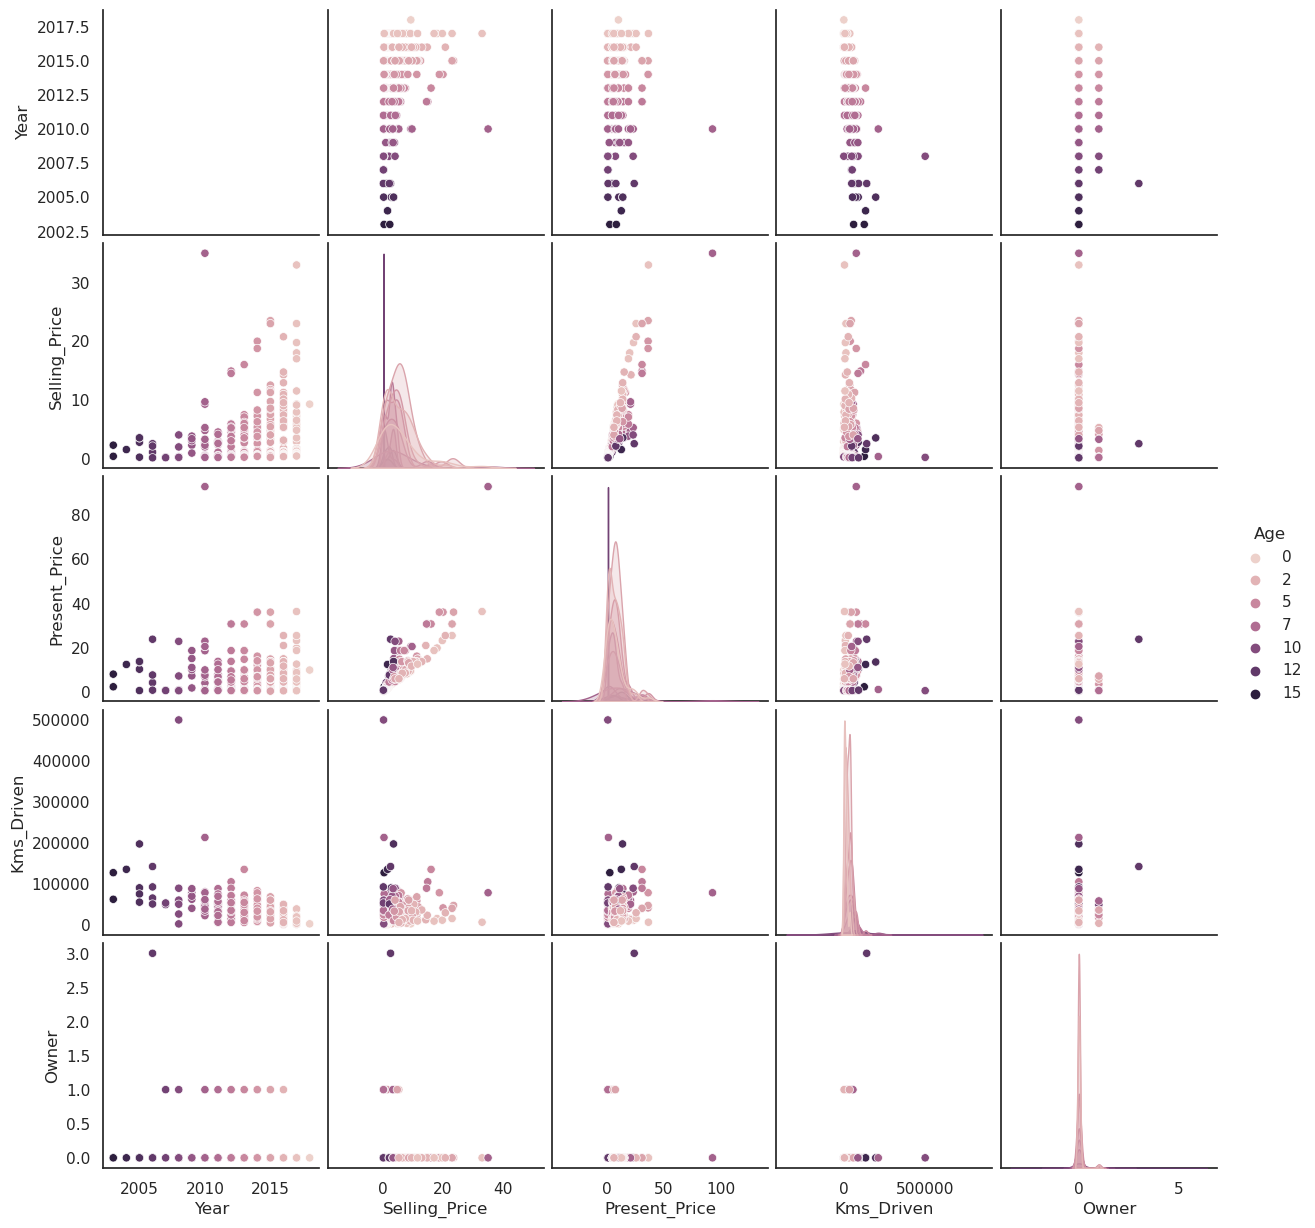

In [280]:
sns.pairplot(df, hue="Age")

In [281]:
df = df.drop(columns=['Car_Name'])
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0,4
1,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0,5
2,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0,1
3,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0,7
4,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0,4
5,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0,0
6,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0,3
7,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0,3
8,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0,2
9,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0,3


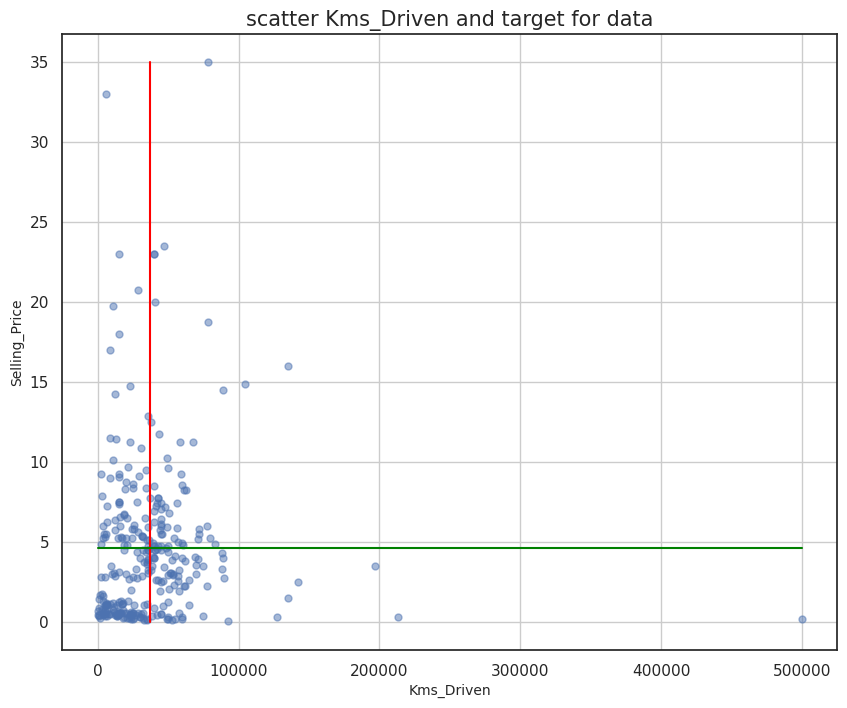

36947.20598006644
4.661295681063127


In [282]:
mean = np.mean (df['Kms_Driven'])
meany = np.mean (df['Selling_Price'])

plt.figure(figsize=(10,8))
plt.scatter(df['Kms_Driven'], df['Selling_Price'], s=25, alpha=.5)
plt.plot((mean , mean), (0, max(df['Selling_Price'])), 'red')
plt.plot((0, max(df['Kms_Driven'])), (meany, meany), 'green')
plt.title('scatter Kms_Driven and target for data', fontsize=15)
plt.xlabel("Kms_Driven", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()
print(mean)
print(meany)

In [283]:
LE = LabelEncoder()

df_label = LE.fit_transform(df['Fuel_Type'])
df_label1 = LE.fit_transform(df['Seller_Type'])
df_label2 = LE.fit_transform(df['Transmission'])

df_label = pd.DataFrame(df_label, columns=['Fuel_Type_le'])
df_label1 = pd.DataFrame(df_label1, columns=['Seller_Type_le'])
df_label2 = pd.DataFrame(df_label2, columns=['Transmission_le'])

df_labelencoding = pd.concat([df, df_label, df_label1, df_label2], axis=1)
df_processing = df_labelencoding.drop(columns=['Fuel_Type', 'Seller_Type', 'Transmission', 'Year'])
df_processing

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_le,Seller_Type_le,Transmission_le
0,3.35,5.590,27000,0,4,2,0,1
1,4.75,9.540,43000,0,5,1,0,1
2,7.25,9.850,6900,0,1,2,0,1
3,2.85,4.150,5200,0,7,2,0,1
4,4.60,6.870,42450,0,4,1,0,1
5,9.25,9.830,2071,0,0,1,0,1
6,6.75,8.120,18796,0,3,2,0,1
7,6.50,8.610,33429,0,3,1,0,1
8,8.75,8.890,20273,0,2,1,0,1
9,7.45,8.920,42367,0,3,1,0,1


In [284]:
df_oneHotencoding = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)
df_oneHotencoding = df_oneHotencoding.drop(columns=['Year'])
df_oneHotencoding

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.590,27000,0,4,0,1,0,1
1,4.75,9.540,43000,0,5,1,0,0,1
2,7.25,9.850,6900,0,1,0,1,0,1
3,2.85,4.150,5200,0,7,0,1,0,1
4,4.60,6.870,42450,0,4,1,0,0,1
5,9.25,9.830,2071,0,0,1,0,0,1
6,6.75,8.120,18796,0,3,0,1,0,1
7,6.50,8.610,33429,0,3,1,0,0,1
8,8.75,8.890,20273,0,2,1,0,0,1
9,7.45,8.920,42367,0,3,1,0,0,1


In [285]:
corr_matrix = df_oneHotencoding.corr()
corr_matrix['Selling_Price'].sort_values(ascending=False)

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Kms_Driven                0.029187
Owner                    -0.088344
Age                      -0.236141
Transmission_Manual      -0.367128
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

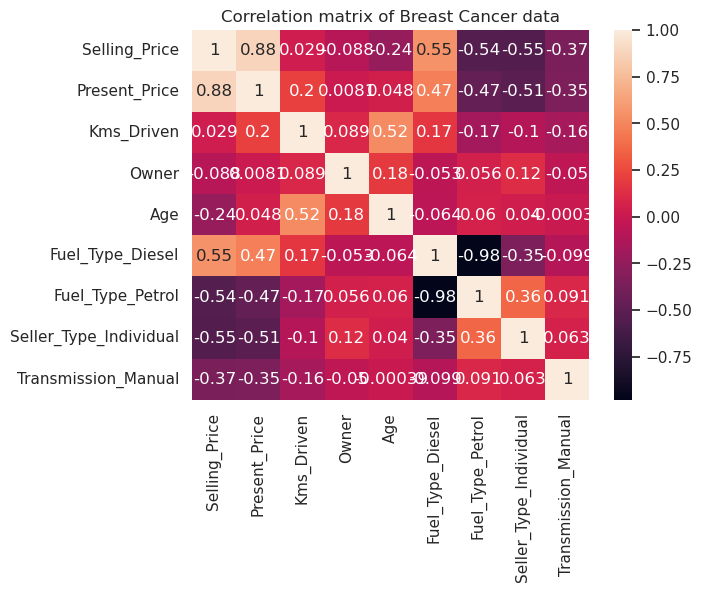

In [286]:
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation matrix of Breast Cancer data")
plt.show()

In [287]:
target = df_oneHotencoding['Selling_Price']
scale = MinMaxScaler(feature_range=(0, 1))
norm1 = scale.fit_transform(df_oneHotencoding[['Present_Price','Kms_Driven','Owner','Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']])
norm1 = pd.DataFrame(norm1, columns=['Present_Price','Kms_Driven','Owner','Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'])
df_final = pd.concat([norm1, target], axis=1)
df_final

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,0.057109,0.053053,0.000000,0.266667,0.0,1.0,0.0,1.0,3.35
1,0.099913,0.085085,0.000000,0.333333,1.0,0.0,0.0,1.0,4.75
2,0.103273,0.012813,0.000000,0.066667,0.0,1.0,0.0,1.0,7.25
3,0.041504,0.009409,0.000000,0.466667,0.0,1.0,0.0,1.0,2.85
4,0.070980,0.083984,0.000000,0.266667,1.0,0.0,0.0,1.0,4.60
5,0.103056,0.003145,0.000000,0.000000,1.0,0.0,0.0,1.0,9.25
6,0.084525,0.036629,0.000000,0.200000,0.0,1.0,0.0,1.0,6.75
7,0.089835,0.065924,0.000000,0.200000,1.0,0.0,0.0,1.0,6.50
8,0.092870,0.039586,0.000000,0.133333,1.0,0.0,0.0,1.0,8.75
9,0.093195,0.083818,0.000000,0.200000,1.0,0.0,0.0,1.0,7.45


In [288]:
X_one = df_final['Present_Price'].values.reshape(-1, 1)
Y_one = df_final['Selling_Price'].values.reshape(-1, 1)

In [289]:
x_train_one, x_test_one, y_train_one, y_test_one = train_test_split(X_one, Y_one, test_size=.2, random_state=0)

In [290]:
print(x_train_one.shape)
print(x_test_one.shape)
print(y_train_one.shape)
print(y_test_one.shape)

(240, 1)
(61, 1)
(240, 1)
(61, 1)


In [291]:
# def evaluation_kfold(X,Y):
#     mean_list = []
#     regressor_one = LinearRegression()
#     for fold in range (2, 11):
#         kfold_validation = KFold (fold)
#         result = cross_val_score (regressor_one, X, Y, cv=kfold_validation)* 100
#         mean = np.mean(result)
#         mean_list.append(mean)
#     return mean_list
# print(evaluation_kfold(X_one, Y_one))
# plt.plot(evaluation_kfold(X_one, Y_one))
# plt.show()

In [292]:
regressor_one = LinearRegression()

In [293]:
regressor_one.fit(x_train_one, y_train_one)

LinearRegression()

In [294]:
y_pred_one = regressor_one.predict(x_test_one)

In [295]:
y_pred_one

array([[ 5.40367775],
       [ 1.15777727],
       [ 3.57141372],
       [ 6.49313204],
       [10.53896909],
       [ 3.70511948],
       [ 4.1111888 ],
       [ 1.02110028],
       [ 4.1111888 ],
       [ 5.40367775],
       [ 3.02668658],
       [ 1.21918288],
       [ 3.57141372],
       [ 5.67108926],
       [ 6.09201478],
       [12.21276704],
       [ 4.95799191],
       [ 4.09633261],
       [ 1.26870353],
       [ 1.65001253],
       [ 4.71534073],
       [ 3.57141372],
       [ 5.40367775],
       [ 7.48354503],
       [ 1.12014158],
       [ 1.16471016],
       [ 1.13846422],
       [ 1.3429845 ],
       [ 1.23899114],
       [ 8.19664238],
       [ 4.1111888 ],
       [ 5.651281  ],
       [ 1.23899114],
       [ 5.15112244],
       [ 5.70080165],
       [ 1.49154645],
       [ 4.56182671],
       [ 4.63610769],
       [ 1.12014158],
       [ 7.68162762],
       [ 5.61661654],
       [18.55636223],
       [ 3.57141372],
       [ 4.27955901],
       [ 4.74010105],
       [ 7

In [296]:
print(metrics.mean_absolute_error(y_test_one, y_pred_one))
print(metrics.mean_squared_error(y_test_one, y_pred_one))
print(metrics.r2_score(y_test_one, y_pred_one))


1.553899315736052
5.244314257324024
0.7925288537728552


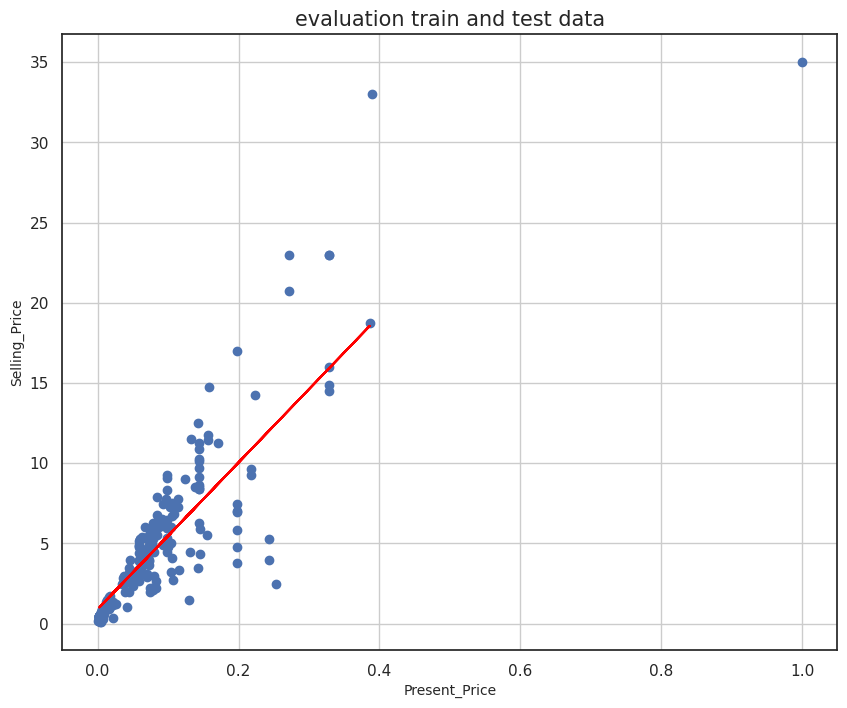

In [297]:
plt.figure(figsize=(10,8))
plt.scatter(x_train_one, y_train_one)
plt.plot(x_test_one, y_pred_one, "red")
plt.title('evaluation train and test data', fontsize=15)
plt.xlabel("Present_Price", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

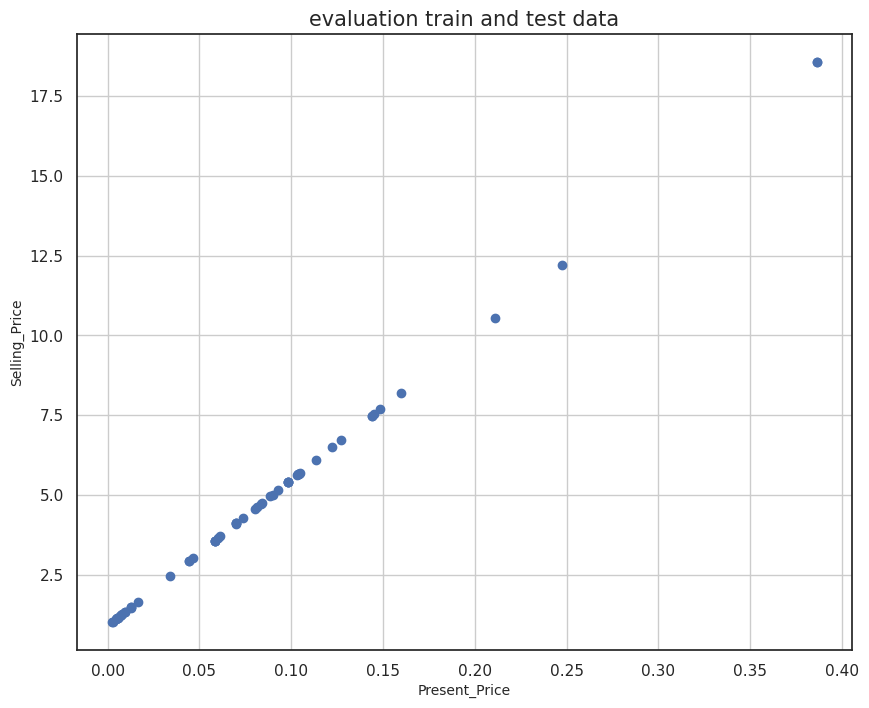

In [298]:
plt.figure(figsize=(10,8))
plt.scatter(x_test_one, y_pred_one)
# plt.plot(x_test_one, y_pred_one, "red")
plt.title('evaluation train and test data', fontsize=15)
plt.xlabel("Present_Price", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.grid()
plt.show()

[0.7925288537728552, -0.01920956472448765, -0.007778679789356202, 0.08622772011289648, 0.3185947718024593, 0.31814724819246243, 0.3476097732755665, 0.25857447324983474]
[0.8247579230471453, 0.7821014524200155, 0.8873081285616653, 0.8218076360433313, 0.8210523536294145, 0.8049983282069675, 0.8022743699883137]
[0.8168131039041263, 0.8874460463620475, 0.8578051496094717, 0.8574824632351485, 0.8389352628111784, 0.8346078237581944]
[0.8798629933907753, 0.8545250090094961, 0.8536452125775223, 0.8342963405218072, 0.8225942173840438]
[0.8937520513053406, 0.8938888321306774, 0.891348566943486, 0.8856935772964754]
[0.8938132395761078, 0.9013981971608634, 0.9061697572381655]
[0.9015733005536528, 0.9061841802618432]
[0.9144342972228514]


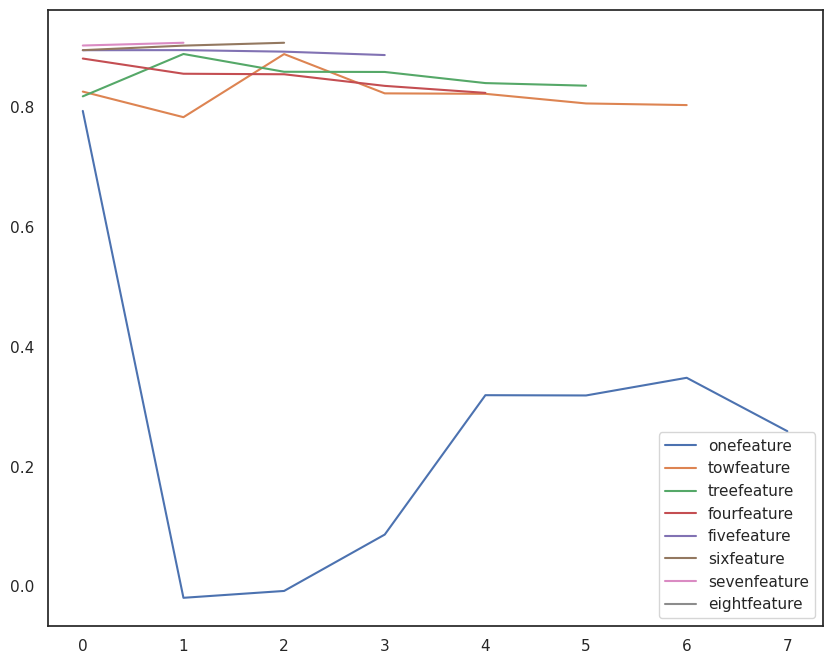

In [299]:
def test_onefeature(df):
    feature_list = []
    for feature in range(0, 8):
        X = df[df.columns[feature]].values.reshape(-1, 1)
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature_list.append(R2_score)
    print(feature_list)
    return feature_list
    

def test_twofeature(df):
    feature2_list = []
    for feature in range(1, 8):
        X = df[[df.columns[0], df.columns[feature]]]
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature2_list.append(R2_score)
    print(feature2_list)
    return feature2_list


def test_treefeature(df):
    feature3_list = []
    for feature in range(2, 8):
        X = df[[df.columns[0], df.columns[1], df.columns[feature]]]
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature3_list.append(R2_score)
    print(feature3_list)
    return feature3_list


def test_fourfeature(df):
    feature4_list = []
    for feature in range(3, 8):
        X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[feature]]]
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature4_list.append(R2_score)
    print(feature4_list)
    return feature4_list


def test_fivefeature(df):
    feature5_list = []
    for feature in range(4, 8):
        X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[3], df.columns[feature]]]
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature5_list.append(R2_score)
    print(feature5_list)
    return feature5_list


def test_sixfeature(df):
    feature6_list = []
    for feature in range(5, 8):
        X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[feature]]]
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature6_list.append(R2_score)
    print(feature6_list)
    return feature6_list



def test_sevenfeature(df):
    feature8_list = []
    for feature in range(6, 8):
        X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[feature]]]
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature8_list.append(R2_score)
    print(feature8_list)
    return feature8_list


def test_eightfeature(df):
    feature9_list = []
    for feature in range(7, 8):
        X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6], df.columns[feature]]]
        Y = df.iloc[:,8].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        R2_score = metrics.r2_score(y_test, y_pred)
        feature9_list.append(R2_score)
    print(feature9_list)
    return feature9_list

plt.figure(figsize=(10, 8))
plt.plot(test_onefeature(df_final), label='onefeature')
plt.plot(test_twofeature(df_final), label='towfeature')
plt.plot(test_treefeature(df_final), label='treefeature')
plt.plot(test_fourfeature(df_final), label='fourfeature')
plt.plot(test_fivefeature(df_final), label='fivefeature')
plt.plot(test_sixfeature(df_final), label='sixfeature')
plt.plot(test_sevenfeature(df_final), label='sevenfeature')
plt.plot(test_eightfeature(df_final), label='eightfeature')

plt.legend()
plt.show()

[0.8732643933590941, 0.9144342972228514, 0.8517983059778269, 0.8481686704410558, 0.8467962011700026]


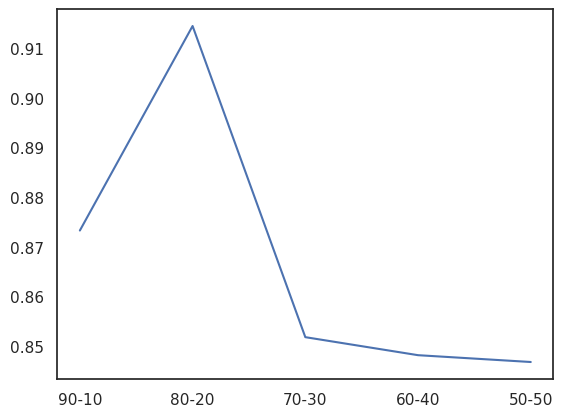

In [300]:
def test_size(df):
    test_list = []
    X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6], df.columns[7]]]
    Y = df.iloc[:, 8].values.reshape(-1, 1)
    for test in range(1, 6):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(test/10), random_state=0)
        regressor = LinearRegression() 
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        R2_score = metrics.r2_score(y_test, y_pred)
        test_list.append(R2_score)
    print(test_list)
    return test_list


def kfold_valedation(df):
    kfold_list = []
    X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6], df.columns[7]]]
    Y = df.iloc[:, 8].values.reshape(-1, 1)
    for k in range (2, 11):
        regressor = LinearRegression()
        kfold_validation = KFold (k, shuffle=True, random_state=0)
        result = cross_val_score(regressor, X, Y , cv=kfold_validation)
        print(result)
        mean = np.mean(result)
        kfold_list.append(mean)
    print(kfold_list)
    return kfold_list

# plt.plot(kfold_valedation(df_final))
# plt.show()

plt.plot(test_size(df_final))
plt.xticks(range(0, 5), ['90-10', '80-20', '70-30', '60-40', '50-50'])
plt.show()

In [301]:
X = df_final[[df_final.columns[0], df_final.columns[2], df_final.columns[3], df_final.columns[4], df_final.columns[5], df_final.columns[6], df_final.columns[7]]]
Y = df_final.iloc[:, 8].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
regressor = LinearRegression() 
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
R2_score = metrics.r2_score(y_test, y_pred)
R2_score

0.9114623972338539

In [302]:
print (regressor.intercept_)
print(regressor.coef_)

[3.94767732]
[[39.29496629 -2.87580151 -6.42723599  2.42568204  0.61156513 -1.11948485
  -1.30065782]]


In [303]:
# present_Price = float(input("please enter present price : "))
# KMS_Driven = float(input("please enter KMS Driven : "))
# Fuel_Type = float(input("please enter Fuel Type : "))
# Seller_type = float(input("please enter Seller type : "))
# Transmission = float(input("please enter Transmission : "))
# Owner = float(input("please enter Owner : "))
# Age = float(input("please enter Age : "))

# y = regressor.intercept_ + (regressor.coef_[0][0] * present_Price) +  (regressor.coef_[0][1] * KMS_Driven) + (regressor.coef_[0][2] * Seller_type) + (regressor.coef_[0][3] * Transmission) + (regressor.coef_[0][4] * Owner) + (regressor.coef_[0][5] * Age) 
# print(y)

In [304]:
def kfold_valedation_test(df):
    X = df[[df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6], df.columns[7]]]
    Y = df.iloc[:, 8].values.reshape(-1, 1)
    regressor = LinearRegression()
    kfold_validation = KFold (5, shuffle=True, random_state=0)
    result = cross_val_score(regressor, X, Y , cv=kfold_validation)
    print(result)
    mean = np.mean(result)
    print(mean)
    

kfold_valedation(df_final)



[0.8467962  0.72492348]
[0.84927317 0.84475488 0.84355828]
[0.86393625 0.8131535  0.70712542 0.89509073]
[0.9144343  0.79951689 0.8705894  0.79430099 0.87435594]
[0.89493675 0.83153636 0.85412092 0.82766245 0.75225    0.89217792]
[0.8971285  0.83491825 0.82768644 0.87239874 0.80042919 0.79059083
 0.84310913]
[0.87295051 0.87007422 0.76565078 0.86181104 0.84439571 0.66899036
 0.9127282  0.84268247]
[0.87886793 0.86854014 0.71898808 0.88433111 0.85985021 0.85936253
 0.62227333 0.89827241 0.84784392]
[0.87326439 0.95072573 0.79258572 0.82159635 0.86572056 0.84753536
 0.75047543 0.75010597 0.90104756 0.84100797]
[0.7858598400960086, 0.8458621105225311, 0.8198264735855161, 0.8506395045266663, 0.8421140666432713, 0.8380372969884078, 0.8299104113719579, 0.8264810737534333, 0.8394065045794925]


[0.7858598400960086,
 0.8458621105225311,
 0.8198264735855161,
 0.8506395045266663,
 0.8421140666432713,
 0.8380372969884078,
 0.8299104113719579,
 0.8264810737534333,
 0.8394065045794925]

In [305]:
X = df_final[[df_final.columns[0], df_final.columns[1], df_final.columns[2], df_final.columns[3], df_final.columns[4], df_final.columns[5], df_final.columns[6]]]
Y = df_final.iloc[:, 7].values.reshape(-1, 1)
regressor = LinearRegression()
kfold_validation = KFold (5, shuffle=True, random_state=0)

for i, (train_index, test_index) in enumerate(kfold_validation.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  0   1   2   3   4   6   9  10  11  13  14  16  17  18  19  20  21  23
  24  25  27  28  29  30  31  32  33  35  36  37  38  39  40  41  42  43
  44  46  47  48  49  50  51  53  54  56  57  58  60  61  62  64  65  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  82  83  84  85  86
  87  88  90  91  93  94  95  96  97  98  99 100 102 103 104 105 107 109
 110 112 113 114 115 116 117 119 120 121 123 124 125 126 127 128 130 131
 132 134 135 138 139 140 141 142 143 145 146 147 148 149 151 153 154 155
 156 157 158 159 160 161 162 163 164 165 167 168 169 170 171 172 173 174
 177 178 179 180 181 183 185 186 187 188 189 191 192 193 194 195 196 197
 198 199 200 202 203 204 206 207 208 209 210 211 213 217 218 219 220 222
 228 229 230 231 232 233 235 236 237 239 240 242 243 244 245 247 248 249
 251 252 255 256 257 258 259 260 262 264 265 266 267 268 269 270 272 273
 274 275 276 277 278 279 280 281 283 284 286 287 288 289 290 291 292 293
 294 295 297 298 299 300]
  

In [306]:
X = df_final[[df_final.columns[0], df_final.columns[1], df_final.columns[2], df_final.columns[3], df_final.columns[4], df_final.columns[5], df_final.columns[6], df_final.columns[7]]]
Y = df_final.iloc[:, 8].values.reshape(-1, 1)
regressor = LinearRegression()
kfold_validation = KFold (5, shuffle=True, random_state=0)
result = cross_val_score(regressor, X, Y , cv=kfold_validation)
print(result)
mean = np.mean(result)
print(mean)

[0.9144343  0.79951689 0.8705894  0.79430099 0.87435594]
0.8506395045266663


In [307]:
Train_index1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
            ,19,21,22,23,24,25,26,28,29,30,31,32,34,35,36,38,39,40
            ,41,42,43,45,47,48,49,50,51,52,53,55,56,57,58,59,61,62
            ,63,65,66,67,68,69,70,72,75,77,78,79,80,81,82,84,85,86
            ,87,88,89,91,92,93,94,95,96,98,99,100,101,102,104,105,106,107
            ,108,109,110,111,112,113,114,115,117,118,119,120,121,122,123,125,127,128
            ,129,130,131,132,133,136,137,138,139,140,141,142,143,144,147,148,149,150
            ,151,152,153,155,159,162,163,165,166,168,169,170,171,172,174,175,176,177
            ,178,180,181,182,183,184,185,186,187,188,189,190,192,193,194,195,196,197
            ,198,199,200,201,202,203,204,205,206,207,211,212,213,214,215,216,219,220
            ,221,223,224,225,226,227,228,231,232,233,234,235,236,237,238,241,242,243
            ,244,246,248,249,250,251,253,254,256,257,258,259,261,262,263,264,265,266
            ,267,268,269,270,271,272,274,275,276,277,278,279,280,282,284,285,288,290
            ,291,292,293,296,297,298,299]

Test_index1 = [18,20,27,33,37,44,46,54,60,64,71,73,74,76,83,90,97,103
            ,116,124,126,134,135,145,146,154,156,157,158,160,161,164,167,173,179,191
            ,208,209,210,217,218,222,229,230,239,240,245,247,252,255,260,273,281,283
            ,286,287,289,294,295,300]


Train_index3 = [1,2,3,4,5,7,8,9,10,12,13,14,15,16,17,18,19,20
            ,21,22,24,25,26,27,28,29,30,31,32,33,34,37,38,39,40,41
            ,42,44,45,46,47,50,51,52,53,54,55,56,57,58,59,60,61,62
            ,63,64,65,66,67,70,71,72,73,74,75,76,77,79,80,81,83,86
            ,87,88,89,90,92,96,97,99,101,103,104,105,106,107,108,109,110,111
            ,115,116,117,118,120,122,123,124,125,126,127,128,129,130,132,133,134,135
            ,136,137,139,144,145,146,147,150,151,152,153,154,155,156,157,158,159,160
            ,161,163,164,165,166,167,168,169,171,172,173,174,175,176,177,179,181,182
            ,183,184,185,186,187,188,189,190,191,192,193,194,195,197,198,200,201,202
            ,205,208,209,210,211,212,213,214,215,216,217,218,221,222,223,224,225,226
            ,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244
            ,245,246,247,250,251,252,253,254,255,256,259,260,261,263,264,265,266,267
            ,269,270,271,272,273,274,277,278,279,280,281,282,283,285,286,287,288,289
            ,290,292,293,294,295,296,300]

Test_index3 = [0,6,11,23,35,36,43,48,49,68,69,78,82,84,85,91,93,94
            ,95,98,100,102,112,113,114,119,121,131,138,140,141,142
            ,143,148,149,162,170,178,180,196,199,203,204,206,207,219
            ,220,248,249,257,258,262,268,275,276,284,291,297,298,299]


print("fold 1 : ")
print('train :')
print(df_final.loc[Train_index1].mean())
print('test : ')
print(df_final.loc[Test_index1].mean())

print("####################################")

print("fold 3 : ")
print('train :')
print(df_final.loc[Train_index3].mean())
print('test : ')
print(df_final.loc[Test_index3].mean())

fold 1 : 
train :
Present_Price             0.081526
Kms_Driven                0.072933
Owner                     0.016598
Age                       0.292116
Fuel_Type_Diesel          0.199170
Fuel_Type_Petrol          0.796680
Seller_Type_Individual    0.348548
Transmission_Manual       0.850622
Selling_Price             4.757178
dtype: float64
test : 
Present_Price             0.069853
Kms_Driven                0.073105
Owner                     0.005556
Age                       0.288889
Fuel_Type_Diesel          0.200000
Fuel_Type_Petrol          0.783333
Seller_Type_Individual    0.366667
Transmission_Manual       0.933333
Selling_Price             4.276167
dtype: float64
####################################
fold 3 : 
train :
Present_Price             0.078505
Kms_Driven                0.068499
Owner                     0.013831
Age                       0.291840
Fuel_Type_Diesel          0.219917
Fuel_Type_Petrol          0.775934
Seller_Type_Individual    0.348548
Transmission_M

In [308]:
df_final

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,0.057109,0.053053,0.000000,0.266667,0.0,1.0,0.0,1.0,3.35
1,0.099913,0.085085,0.000000,0.333333,1.0,0.0,0.0,1.0,4.75
2,0.103273,0.012813,0.000000,0.066667,0.0,1.0,0.0,1.0,7.25
3,0.041504,0.009409,0.000000,0.466667,0.0,1.0,0.0,1.0,2.85
4,0.070980,0.083984,0.000000,0.266667,1.0,0.0,0.0,1.0,4.60
5,0.103056,0.003145,0.000000,0.000000,1.0,0.0,0.0,1.0,9.25
6,0.084525,0.036629,0.000000,0.200000,0.0,1.0,0.0,1.0,6.75
7,0.089835,0.065924,0.000000,0.200000,1.0,0.0,0.0,1.0,6.50
8,0.092870,0.039586,0.000000,0.133333,1.0,0.0,0.0,1.0,8.75
9,0.093195,0.083818,0.000000,0.200000,1.0,0.0,0.0,1.0,7.45


In [309]:
df_oneHotencoding

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.590,27000,0,4,0,1,0,1
1,4.75,9.540,43000,0,5,1,0,0,1
2,7.25,9.850,6900,0,1,0,1,0,1
3,2.85,4.150,5200,0,7,0,1,0,1
4,4.60,6.870,42450,0,4,1,0,0,1
5,9.25,9.830,2071,0,0,1,0,0,1
6,6.75,8.120,18796,0,3,0,1,0,1
7,6.50,8.610,33429,0,3,1,0,0,1
8,8.75,8.890,20273,0,2,1,0,0,1
9,7.45,8.920,42367,0,3,1,0,0,1


test :  [89.9265146012482, 88.98440179459891, 89.12511319299594, -2.271059892509708, -2.34637989650186, -2.01821485389837, -2.01821485389837, -3.0967898198289268, -3.0967898198289268]
########################################################################################
train :  [86.3346802213545, 84.14159377064357, 84.73763945738476, 1.8018981789892252, 2.1042831741596935, 0.7647380310185414, 0.7647380310185414, 0.7254149598923898, 0.7254149598923898]


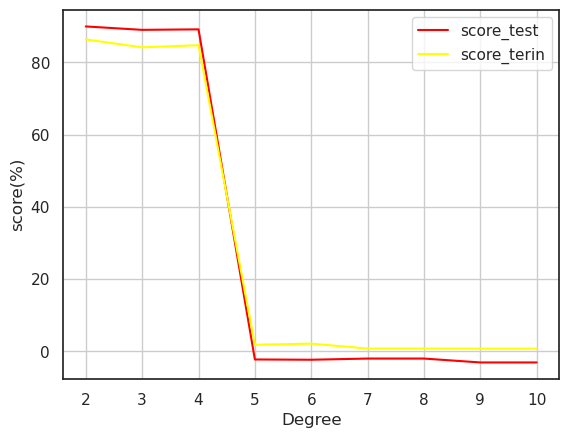

In [310]:
def add_feature(df):
    score_test = []
    score_train = []
    
    for degree in range(2, 11):
        degree_value = df.iloc[:,3]**degree
        df.insert(2, str(degree), degree_value)
        X = df[[df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6], df.columns[7]]]
        Y = df.iloc[:,0].values.reshape(-1, 1)
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        R2_score = metrics.r2_score(y_test, y_pred)
        train_score = regressor.score(x_train, y_train)
        score_train.append(train_score * 100)
        score_test.append(R2_score * 100)
        df.drop(columns=[str(degree)])
        
    
    plt.plot(score_test, 'red', label='score_test')
    plt.plot(score_train, 'yellow', label='score_terin')

    plt.xlabel("Degree")
    plt.ylabel('score(%)')
    plt.xticks(range(0, 9), [degree for degree in range(2, 11)])
    plt.legend()
    plt.grid()
    
    print("test : ", score_test)    
    print("########################################################################################")
    print("train : ", score_train)
    
    return plt.show()
    
add_feature(df_oneHotencoding)

In [311]:
# def add_feature(df):
#     log_value = np.log(2*np.pi*df.iloc[:,0]/ 365)
#     df.insert(1, 'log_value', log_value)
# #     X = df[[df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6], df.columns[7]]]
# #     Y = df.iloc[:,8].values.reshape(-1, 1)
# #     x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
# #     regressor = LinearRegression()
# #     regressor.fit(x_train, y_train)
# #     y_pred = regressor.predict(x_test)
# #     R2_score = metrics.r2_score(y_test, y_pred) * 100
#     return df
    
# add_feature(df_final)

# plt.plot(add_feature(df_final))
# plt.xlabel("Degree")
# plt.ylabel('score(%)')
# plt.xticks(range(0, 9), [degree for degree in range(2, 11)])
# plt.show()